<a href="https://colab.research.google.com/github/dofoll/py/blob/master/ASSIGNMENT_AI_MV_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install matplotlib


In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical

In [ ]:
#checking the backend that keras is using
keras.backend.backend()

'tensorflow'

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import data
from keras.datasets import cifar10

In [ ]:
#reading the imported data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#no of images in the train dataset
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#no of images in the test dataset
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
#CHECKING TYPE OF ARRAY O FTHE DATASET\\

In [ ]:
X_train[5:]

array([[[[159, 102, 101],
         [150,  91,  95],
         [153,  95,  97],
         ...,
         [ 91,  71,  56],
         [ 74,  63,  55],
         [ 76,  58,  55]],

        [[142,  75,  68],
         [146,  72,  66],
         [155,  76,  65],
         ...,
         [127, 105,  71],
         [122, 111,  93],
         [ 86,  69,  61]],

        [[109,  67,  75],
         [ 99,  58,  60],
         [105,  59,  52],
         ...,
         [137, 112,  80],
         [163, 132, 105],
         [ 93,  72,  71]],

        ...,

        [[244, 129,  70],
         [240, 123,  65],
         [241, 122,  65],
         ...,
         [156,  42,  15],
         [179,  59,  26],
         [200,  73,  36]],

        [[246, 133,  74],
         [243, 128,  72],
         [243, 127,  70],
         ...,
         [162,  44,  14],
         [178,  56,  22],
         [192,  65,  27]],

        [[246, 139,  82],
         [243, 133,  78],
         [244, 132,  77],
         ...,
         [166,  47,  14],
        

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#CONVERTING y_train and y_test FROM 2D ARRAY TO 1D ARRAY, SINCE 1D ARRAY IS GOOD ENOUGH FOR THE CLASSIFICATION

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

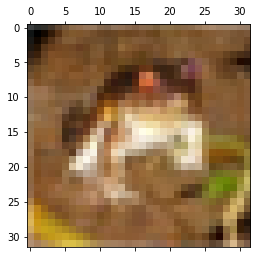

In [ ]:
#visualize the first image
plt.matshow(X_train[0])

In [ ]:
#INTRODCING THE CLASSES OF THE DATASET FOR PROPER LABELLING

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_preview(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

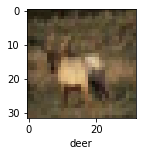

In [ ]:
plot_preview(X_train, y_train, 3)

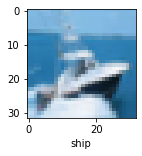

In [ ]:
plot_preview(X_train, y_train,8)

In [ ]:
#NORMALISE DATASET (x_train and x_test), SO THAT THE VALUES OF THE VARIABLE WOULD RANGE BETWEEN 0 AND 1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
#BUILDING CONVOLUTIONAL NEURAL NETWORK FOR IMAGE CLASSIFICATION

In [47]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
   
    
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [48]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [49]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [50]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.4086 - accuracy: 0.4980
Epoch 2/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.0388 - accuracy: 0.6355
Epoch 3/10
1563/1563 [==============================] - 267s 171ms/step - loss: 0.9037 - accuracy: 0.6854
Epoch 4/10
1563/1563 [==============================] - 263s 168ms/step - loss: 0.8049 - accuracy: 0.7198
Epoch 5/10
1563/1563 [==============================] - 262s 167ms/step - loss: 0.7206 - accuracy: 0.7488
Epoch 6/10
1563/1563 [==============================] - 260s 166ms/step - loss: 0.6438 - accuracy: 0.7732
Epoch 7/10
1563/1563 [==============================] - 260s 167ms/step - loss: 0.5836 - accuracy: 0.7947
Epoch 8/10
1563/1563 [==============================] - 260s 166ms/step - loss: 0.5257 - accuracy: 0.8155
Epoch 9/10
1563/1563 [==============================] - 265s 170ms/step - loss: 0.4677 - accuracy: 0.8338
Epoch 10/10
1563/1563 [=======================

In [33]:
#RUNNING CLASSIFICATION REPORT

In [51]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.75      0.87      0.80      1000
           2       0.48      0.71      0.57      1000
           3       0.55      0.43      0.48      1000
           4       0.68      0.58      0.63      1000
           5       0.68      0.54      0.60      1000
           6       0.74      0.78      0.76      1000
           7       0.73      0.76      0.74      1000
           8       0.82      0.81      0.82      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [52]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 14s 44ms/step - loss: 1.0673 - accuracy: 0.6903


[1.067301630973816, 0.6902999877929688]

In [53]:
y_pred = cnn.predict(X_test)
y_pred[:7]

array([[1.15680834e-07, 2.42862512e-08, 4.77402937e-04, 9.98862267e-01,
        8.79230868e-07, 4.89407510e-04, 1.51809727e-04, 7.94780306e-07,
        1.72313012e-05, 2.28939617e-10],
       [8.28301745e-06, 5.87878237e-03, 2.02309545e-12, 2.22663229e-12,
        2.45543450e-14, 5.86348552e-16, 3.25669830e-13, 2.90691577e-14,
        9.94096398e-01, 1.64521189e-05],
       [1.46708161e-01, 2.94796497e-01, 2.14417768e-03, 1.51903331e-02,
        3.40035907e-03, 1.14354989e-04, 1.85477387e-04, 3.88976745e-02,
        4.70908940e-01, 2.76540648e-02],
       [9.52450752e-01, 4.49577085e-04, 6.58175341e-05, 1.43024634e-04,
        4.89419927e-09, 3.83530763e-09, 5.26653654e-09, 1.43724836e-08,
        4.68845293e-02, 6.25544772e-06],
       [8.37033383e-07, 4.22424773e-06, 3.57114361e-03, 1.59311406e-02,
        6.38555467e-01, 1.60272385e-03, 3.40334326e-01, 2.82750499e-08,
        6.29152339e-08, 3.17682325e-09],
       [1.74112003e-07, 5.42726184e-08, 1.88737700e-04, 2.58457265e-04,
   

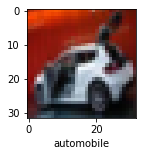

In [54]:
plot_preview(X_test, y_test,6)

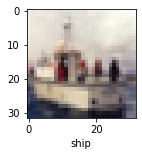

In [55]:
plot_preview(X_test, y_test,88)